# Deterministic Transition System

Represents a transition system [Principles of Model Checking, Def. 2.1].
$$
    TSys = (S, A, T, AP, L)
$$
In the `TSys` class, each component is represented as a function.

- The set of states $S$ is represented by `TSys.states` function,
- The set of actions $A$ is represented by `TSys.actions` function,
- The transition function $T$ is represented by `TSys.delta` function,
- The set of atomic propositions is represented by `TSys.atoms` function,
- The labeling function $L$ is represented by `TSys.label` function.

All of the above functions are marked abstract. The recommended way to use `TSys` class is by subclassing it and implementing its component functions.

The example shows an example of defining a deterministic transition system.


## Car Parking Transition System

Consider a car parking with $n$ slots where cars can `enter` or `exit`.
There are two properties of interest, namely whether the parking lot is empty or full.

The `CarParking` class demonstrates how a parameterized transition system can be defined.



In [1]:
# This code block is necessary only when using `ggsolver:v0.1` docker image.
import sys
sys.path.append('/home/ggsolver/')
sys.path.append('/home/jovyan/ggsolver/')

from examples.notebooks.jupyter_patch import *

In [2]:
import logging
logger = logging.getLogger()
# logger.setLevel(logging.ERROR)
logger.setLevel(logging.DEBUG)

A *deterministic* transition system is defined as follows:

- First we define a class that inherits from `ggsolver.models.TSys` class.
  We will call it `CarParking`.
- Define its `__init__` method to define instance variables that store input parameters.
  In our case, the only input parameter is the number of slots in parking lot: `num_slots`.
- Implement the component functions `states, actions, delta, atoms, label` that define the transition system.

<div class="alert alert-block alert-warning">
<b>Note:</b> If `__init__` method is defined for your derived class, then a call to `super(DerivedTSys, self).__init__()` must be made.
</div>


In [3]:
from ggsolver.models import TSys

class CarParking(TSys):
    def __init__(self, num_slots):
        super(CarParking, self).__init__()
        self.num_slots = num_slots

    def states(self):
        """
        To determine whether parking is full or empty, we can maintain a count of the number of cars
        in the parking lot. Hence, the states can be represented by integers from 0 to num_slots.
        """
        return list(range(self.num_slots + 1))

    def actions(self):
        """
        There are two actions: enter and exit, that represent a car has entered or exited.
        """
        return ["enter", "exit"]

    def delta(self, state, act):
        """
        The transition function should determine the next state, i.e. how many cars will be there in the parking lot, based on how many cars are currently in the parking lot and the action: whether a car is entering or exiting.
        """
        if state == 0 and act == "exit":
            return 0
        elif state == self.num_slots and act == "enter":
            return self.num_slots
        elif act == "enter":
            return state + 1
        else:   # if act == "exit":
            return state - 1

    def atoms(self):
        """
        We care about two properties: whether the parking lot is "empty" or it is "full".
        Hence, we will define two atomic propositions.
        """
        return ["empty", "full"]

    def label(self, state):
        """
        The parking lot is empty if count is 0, and it is full when count is equal to num_slots.
        """
        if state == 0:
            return ["empty"]
        elif state == self.num_slots:
            return ["full"]
        else:
            return []

Note that our class definition closely follows the mathematical definition of a transition system. This provides an easy interface to implement various real-life or research paper based transition sysetsm models directly.

Moreover, the ability to define parameters such as `num_slots` allows us to define a family of parameterized transition systems. This is particularly useful when running batch simulations.

However, the above style of defining transition system is inefficient. Especially, when running planning algorithms on large transition system, a large number of calls are made to `states` and `delta` function. Since there is non-trivial computation occurring in these functions, it slows the algorithms.

In such cases, it is efficient to use discrete graph representation of the transition system. We provide an easy interface to construct and visualize the equivalent graph representation of the defined transition system. This involves three steps:

- **Instantiate** your derived transition system class.
- **Graphify** the instance.
- **Save to PNG** the graph to a PNG for visualization.

**Note:** Graphs with more than 500 nodes cannot be saved to PNG. At present the best way to
visualize such graphs is to `serialize` them and manually check them.

We demonstrate these steps next.

### Instantiate CarParking
This is same as instantiating any class in Python.

In [4]:
tsys = CarParking(num_slots=5)

In case the initial state of the transition system is known, it can be set by calling `initialize` function as shown below. In our case, assume that parking lot starts empty.

The initial state of the transition system can be checked using `init_state` property.

In [5]:
tsys.initialize(0)
print("init_state:", tsys.init_state())

init_state: 0


### Graphify

The `graphify` function returns a `ggsolver.graph.Graph` object that represents a multi-digraph. See [Graph Class API](https://akulkarni.me/ggsolver/modules/graph.html) and [Graph Class Example](https://akulkarni.me/ggsolver/examples/graphs.html) for more information about Graph class.

**Note:** If any changes are made to the transition system after a call to graphify, the changes will not reflect in the graph. The `graphify` must be called again.

In [6]:
graph = tsys.graphify()

INFO:root:[INFO] Globbed node properties: {'label'}
INFO:root:[INFO] Globbed edge properties: set()
INFO:root:[INFO] Globbed graph properties: {'is_probabilistic', 'is_deterministic', 'actions', 'init_state', 'atoms'}
INFO:root:[INFO] Duplicate node, edge properties: set()
INFO:root:[INFO] Duplicate edge, graph properties: set()
INFO:root:[INFO] Duplicate graph, node properties: set()
INFO:root:[INFO] Processed node property: states. Added 6 states. [OK]
INFO:root:[INFO] Input domain function detected as 'actions'. [OK]
INFO:root:[INFO] Processed graph property: input_domain. [OK]
Unpointed graphify adding edges: 100% 12/12 [00:00<00:00, 43614.95it/s]
INFO:root:[INFO] Processed edge property: input. [OK]
INFO:root:[INFO] Processed graph property: prob. [OK]
INFO:root:[INFO] Processed node property: label. [OK]
INFO:root:[INFO] Processed graph property: is_probabilistic. [OK]
INFO:root:[INFO] Processed graph property: is_deterministic. [OK]
INFO:root:[INFO] Processed graph property: act

 [SUCCESS] <Graph with |V|=6, |E|=12> generated. 


In [7]:
tsys.initialize(1)
graph = tsys.graphify(pointed=True)

INFO:root:[INFO] Globbed node properties: {'label'}
INFO:root:[INFO] Globbed edge properties: set()
INFO:root:[INFO] Globbed graph properties: {'is_probabilistic', 'is_deterministic', 'actions', 'init_state', 'atoms'}
INFO:root:[INFO] Duplicate node, edge properties: set()
INFO:root:[INFO] Duplicate edge, graph properties: set()
INFO:root:[INFO] Duplicate graph, node properties: set()
INFO:root:[INFO] Running graphify UNPOINTED.
INFO:root:[INFO] Input domain function detected as 'actions'. [OK]
INFO:root:[INFO] Processed graph property: input_domain. [OK]
Pointed graphify adding edges: 100% 6/6 [00:00<00:00, 17319.91it/s]
INFO:root:[INFO] Processed edge property: input. [OK]
INFO:root:[INFO] Processed graph property: prob. [OK]
INFO:root:[INFO] Processed node property: label. [OK]
INFO:root:[INFO] Processed graph property: is_probabilistic. [OK]
INFO:root:[INFO] Processed graph property: is_deterministic. [OK]
INFO:root:[INFO] Processed graph property: actions. [OK]
INFO:root:[INFO] Pr

 [SUCCESS] <Graph with |V|=6, |E|=12> generated. 


### Visualize using to_png function

A graph with less than 500 nodes can be visualized using `to_png` function. The `to_png` function requires one positional argument:

- `fpath`: Path to where the generated PNG should be stored.

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'bKGD' 41 6
DEBUG:PIL.PngImagePlugin:b'bKGD' 41 6 (unknown)
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 59 8192



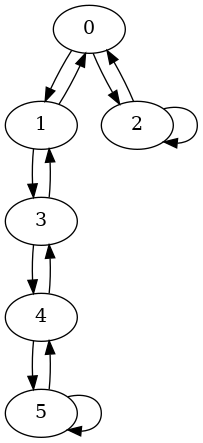

In [8]:
# Define path where to save the generated PNG.
fpath = "figures/tsys/car_parking_nolabels.png"

# Generate a PNG
graph.to_png(fpath)

# Show PNG in Jupyter Notebook
html = img2html(fpath)
IPython.display.HTML(html)

As you may notice, the generated PNG has the structure as expected. However, it would be nice to be visualize what atomic propositions hold in which state and which edges correspond to which actions.

For this purpose, we pass two optional arguments to `to_png` function.

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'bKGD' 41 6
DEBUG:PIL.PngImagePlugin:b'bKGD' 41 6 (unknown)
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 59 8192



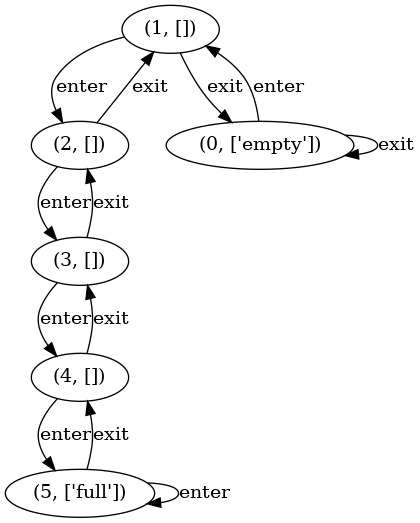

In [9]:
# Define path where to save the generated PNG.
fpath = "figures/tsys/car_parking_labeled.png"

# Generate a PNG
graph.to_png(fpath, nlabel=["state", "label"], elabel=["input"])

# Show PNG in Jupyter Notebook
html = img2html(fpath)
IPython.display.HTML(html)

## Serialization

The graph of a transition system can be serialized into a dictionary. This allows us to save it or share it easily over a communication channel.

See [Graph.Serialize() API Documentation](https://akulkarni.me/ggsolver/modules/models.html#ggsolver.models.TSys.serialize) to understand the components of generated dictionary.

In [10]:
graph.serialize()

{'graph': {'nodes': 6,
  'edges': {0: {1: 1, 2: 1},
   1: {3: 1, 0: 1},
   2: {0: 1, 2: 1},
   3: {4: 1, 1: 1},
   4: {5: 1, 3: 1},
   5: {5: 1, 4: 1}},
  'node_properties': {'state': {'default': None,
    'dict': {0: 1, 2: 0, 1: 2, 3: 3, 4: 4, 5: 5}},
   'label': {'default': None,
    'dict': {0: [], 1: [], 2: ['empty'], 3: [], 4: [], 5: ['full']}}},
  'edge_properties': {'input': {'default': None,
    'dict': [{'edge': (0, 1, 0), 'pvalue': 'enter'},
     {'edge': (0, 2, 0), 'pvalue': 'exit'},
     {'edge': (2, 0, 0), 'pvalue': 'enter'},
     {'edge': (2, 2, 0), 'pvalue': 'exit'},
     {'edge': (1, 3, 0), 'pvalue': 'enter'},
     {'edge': (1, 0, 0), 'pvalue': 'exit'},
     {'edge': (3, 4, 0), 'pvalue': 'enter'},
     {'edge': (3, 1, 0), 'pvalue': 'exit'},
     {'edge': (4, 5, 0), 'pvalue': 'enter'},
     {'edge': (4, 3, 0), 'pvalue': 'exit'},
     {'edge': (5, 5, 0), 'pvalue': 'enter'},
     {'edge': (5, 4, 0), 'pvalue': 'exit'}]},
   'prob': {'default': None, 'dict': []}},
  'graph_p